In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('/content/china-africa-ICT.csv', encoding='ISO-8859-1')

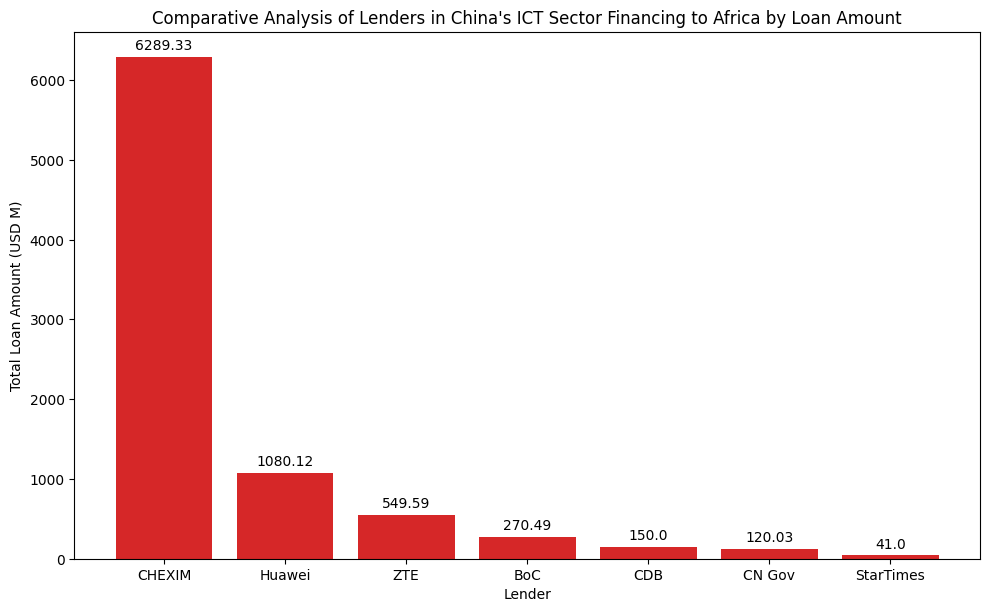

In [71]:
replacement_dict = {
    'Zhongxing Telecommunication Equipment Corporation (ZTE)': 'ZTE',
    'Huawei Technologies Co., Ltd.': 'Huawei',
    'StarTimes Group (StarTimes)': 'StarTimes'
}

df['Lender'] = df['Lender'].replace(replacement_dict)

lender_stats = df.groupby('Lender')['Loan (USD M)'].agg(['count', 'sum']).reset_index()
lender_stats_sorted = lender_stats.sort_values(by='sum', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Lender')
ax1.set_ylabel('Total Loan Amount (USD M)')
bars = ax1.bar(lender_stats_sorted['Lender'], lender_stats_sorted['sum'], color=color)
ax1.tick_params(axis='y')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

fig.tight_layout()
plt.title("Comparative Analysis of Lenders in China's ICT Sector Financing to Africa by Loan Amount")
plt.show()

In [72]:
df_total = pd.read_csv('/content/china-africa-ICT-total.csv')

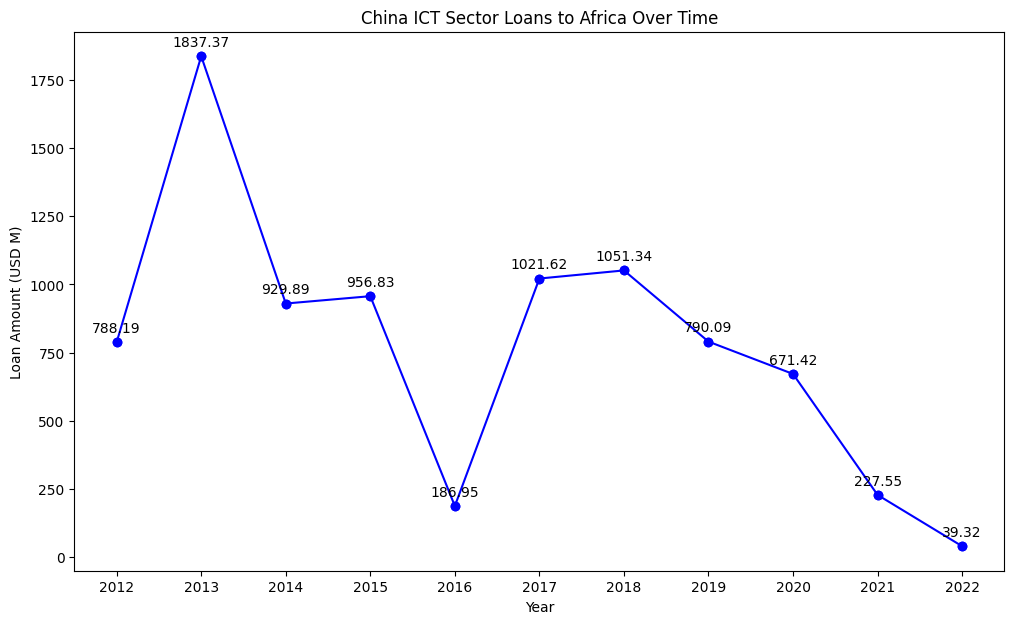

In [73]:
df_total = df_total[df_total['Year'] != 'Total']
df_total = df_total[df_total['Year'] != '2000']
df_total = df_total[df_total['Year'] != '2001']
df_total = df_total[df_total['Year'] != '2002']
df_total = df_total[df_total['Year'] != '2003']
df_total = df_total[df_total['Year'] != '2004']
df_total = df_total[df_total['Year'] != '2005']
df_total = df_total[df_total['Year'] != '2006']
df_total = df_total[df_total['Year'] != '2007']
df_total = df_total[df_total['Year'] != '2008']
df_total = df_total[df_total['Year'] != '2009']
df_total = df_total[df_total['Year'] != '2010']
df_total = df_total[df_total['Year'] != '2011']

df_total['Year'] = pd.to_numeric(df_total['Year'])
df_total['USD M'] = pd.to_numeric(df_total['USD M'])

plt.figure(figsize=(12, 7))
for i, row in df_total.iterrows():
    plt.plot(row['Year'], row['USD M'], marker='o', color='blue')
    plt.text(row['Year'], row['USD M'] + (max(df_total['USD M']) * 0.02), f"{row['USD M']:.2f}", ha='center')

plt.plot(df_total['Year'], df_total['USD M'], marker='o', linestyle='-', color='blue')
plt.title('China ICT Sector Loans to Africa Over Time')
plt.xlabel('Year')
plt.ylabel('Loan Amount (USD M)')
plt.grid(False)
plt.xticks(df_total['Year'])
plt.show()

In [74]:
data = {
    'Fiscal Year': [2012, 2018, 2016, 2021, 2022],
    'Country': ['Africa Regional', 'Africa Regional', 'Kenya', 'Africa Regional', 'Kenya'],
    'Country Income Level': ['', '', '', 'Lower Mid Income', 'Lower Mid Income'],
    'Project Name': ['Wananchi Holdings Ltd.', 'Africell Holding Limited', 'Mawingu Networks', 'Africa Data Centres', 'Poa Internet Kenya Limited'],
    'Support Type': ['Direct Lending', 'Direct Lending', 'Direct Lending', 'Direct Lending', 'Direct Lending'],
    'Source of Funding': ['Treasury', 'Capital Markets', 'Treasury', 'Treasury', 'Treasury'],
    'Currency': ['USD', 'USD', 'USD', 'USD', 'USD'],
    'Committed': [72000000, 100000000, 4100000, 300000000, 5000000],
    'Exposure / MCL': [66000000, 66818182, 4100000, 300000000, 5000000],
    'Project Description': [
        'Cable TV and broadband services in East Africa.',
        'Expansion of existing wireless business in DRC, Gambia, Uganda and Sierra Leone.',
        'Construction of up to 340 WiFi access points',
        'Acquisition, development, construction and operation of data centers in South Africa, Kenya, and other DFC eligible countries.',
        'Provides low cost internet access to low and middle income households in Kenya.'
    ],
    'Information Summary URL': [
        'https://www.dfc.gov/sites/default/files/media/documents/9000005610.pdf',
        'https://www.dfc.gov/sites/default/files/2019-08/9000042686.pdf',
        'https://www.dfc.gov/sites/default/files/2019-08/9000031411.pdf',
        'https://www.dfc.gov/sites/default/files/media/documents/9000093563_0.pdf',
        'https://www.dfc.gov/sites/default/files/media/documents/9000105274.pdf'
    ]
}

df_us = pd.DataFrame(data)

In [75]:
df_styled = df_us.style.format({
    'Committed': '${0:,.2f}',
    'Exposure / MCL': '${0:,.2f}',
    'Information Summary URL': lambda x: f'<a href="{x}">Link</a>'
}).hide(axis='index')

table_styles = [
    {'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]},
    {'selector': 'td', 'props': [('background-color', 'lightgray'), ('color', 'black')]},
    {'selector': 'td:hover', 'props': [('background-color', 'darkgray')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', 'white')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', 'lightblue')]},
]
df_styled = df_styled.set_table_styles(table_styles)
html = df_styled.render()

html_file_path = '/content/DFC-africa-ICT-styled.html'
with open(html_file_path, 'w') as f:
    f.write(html)

html_file_path

<ipython-input-75-723d9d6c6032>:15: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = df_styled.render()


'/content/DFC-africa-ICT-styled.html'